<a href="https://colab.research.google.com/github/yc-chen10/113-1-finance/blob/main/week7%E4%BD%9C%E6%A5%AD_%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92ANN%E3%80%81CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

####抓股票資料（一年）

In [2]:
# "一詮"股票代號
stock_id = '2486'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = yyyymmdd

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240923&stockNo=2486
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20241029


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/10/01,"11,318,016","1,145,769,093",101.00,103.00,100.00,101.00,+1.00,"6,366"
1,113/10/04,"17,963,455","1,859,383,807",101.00,105.00,100.00,104.00,+3.00,"10,741"
2,113/10/07,"47,792,256","5,263,929,436",106.50,113.00,105.00,111.00,+7.00,"31,550"
3,113/10/08,"26,387,911","2,945,195,121",109.50,113.00,108.50,112.50,+1.50,"18,456"
4,113/10/09,"46,140,678","5,333,619,361",115.00,120.50,111.50,114.00,+1.50,"29,042"
5,113/10/11,"45,049,314","5,348,547,196",115.00,123.00,112.00,119.00,+5.00,"27,176"
6,113/10/14,"29,255,940","3,496,442,412",119.50,123.00,116.50,121.00,+2.00,"19,090"
7,113/10/15,"37,794,073","4,657,800,764",122.50,126.50,120.50,121.50,+0.50,"27,725"
8,113/10/16,"44,783,063","5,620,432,514",120.00,129.50,119.00,124.00,+2.50,"26,267"
9,113/10/17,"19,432,309","2,410,457,345",125.50,126.50,122.00,123.00,-1.00,"11,592"


In [3]:
def get_stock_data(stock_no, year, month):
    # 將日期格式化為 'yyyymmdd'，並指定為該月份的第一天
    date = f"{year}{str(month).zfill(2)}01"
    url = f"https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}"

    # 發送HTTP請求並獲取響應
    response = requests.get(url)
    if response.status_code == 200:
        # 將結果轉換為JSON
        data = response.json()
        if data['stat'] == 'OK':
            # 返回數據中的每日交易資料
            return pd.DataFrame(data['data'], columns=data['fields'])
        else:
            print(f"No data for {year}-{month}")
            return None
    else:
        print(f"Failed to fetch data for {year}-{month}")
        return None


In [4]:
def get_multiple_months(stock_no, start_year, start_month, end_year, end_month):
    all_data = []

    # 循環通過年份和月份來調用API
    current_year = start_year
    current_month = start_month

    while (current_year < end_year) or (current_year == end_year and current_month <= end_month):
        # 獲取單月的股票資料
        monthly_data = get_stock_data(stock_no, current_year, current_month)
        if monthly_data is not None:
            all_data.append(monthly_data)

        # 更新到下一個月份
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1

    # 合併所有月份的數據
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return None


In [5]:
stock_no = '2486'
start_year = 2023
start_month = 9
end_year = 2024
end_month = 9

stock_data = get_multiple_months(stock_no, start_year, start_month, end_year, end_month)

# 打印股票資料
if stock_data is not None:
    print(stock_data)


            日期        成交股數           成交金額     開盤價     最高價    最低價     收盤價  \
0    112/09/01   3,868,792    160,002,813   41.05   42.15  40.70   41.25   
1    112/09/04   3,830,653    161,436,535   41.50   42.90  41.05   42.65   
2    112/09/05  17,914,987    808,543,980   43.20   46.65  43.20   46.10   
3    112/09/06   7,963,726    367,461,917   46.00   46.95  45.60   46.05   
4    112/09/07  39,925,836  1,936,272,799   48.10   49.70  45.70   48.85   
..         ...         ...            ...     ...     ...    ...     ...   
258  113/09/24   8,628,849    821,923,069   94.20   97.30  93.30   94.60   
259  113/09/25   6,529,733    622,251,538   95.60   96.30  94.60   94.90   
260  113/09/26  29,060,361  2,930,693,598   95.80  103.50  95.10  100.50   
261  113/09/27  29,915,593  3,070,955,106  101.00  106.00  99.90  100.00   
262  113/09/30  14,403,514  1,465,344,231   99.30  104.00  99.00  100.00   

      漲跌價差    成交筆數  
0    -0.05   2,155  
1    +1.40   2,311  
2    +3.45  10,074  
3  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      17 non-null     object
 1   成交股數    17 non-null     object
 2   成交金額    17 non-null     object
 3   開盤價     17 non-null     object
 4   最高價     17 non-null     object
 5   最低價     17 non-null     object
 6   收盤價     17 non-null     object
 7   漲跌價差    17 non-null     object
 8   成交筆數    17 non-null     object
dtypes: object(9)
memory usage: 1.3+ KB


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      263 non-null    object
 1   成交股數    263 non-null    object
 2   成交金額    263 non-null    object
 3   開盤價     263 non-null    object
 4   最高價     263 non-null    object
 5   最低價     263 non-null    object
 6   收盤價     263 non-null    object
 7   漲跌價差    263 non-null    object
 8   成交筆數    263 non-null    object
dtypes: object(9)
memory usage: 18.6+ KB


#### 時間格式轉換def

In [8]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
stock_data['日期'] = stock_data['日期'].apply(convert_minguo_to_ad)

In [9]:
# 轉換為 pandas 中的 datetime 格式
stock_data['日期'] = pd.to_datetime(stock_data['日期'], format='%Y/%m/%d')

In [10]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2023-09-01,"3,868,792","160,002,813",41.05,42.15,40.70,41.25,-0.05,"2,155"
1,2023-09-04,"3,830,653","161,436,535",41.50,42.90,41.05,42.65,+1.40,"2,311"
2,2023-09-05,"17,914,987","808,543,980",43.20,46.65,43.20,46.10,+3.45,"10,074"
3,2023-09-06,"7,963,726","367,461,917",46.00,46.95,45.60,46.05,-0.05,"4,466"
4,2023-09-07,"39,925,836","1,936,272,799",48.10,49.70,45.70,48.85,+2.80,"20,963"


#### 轉數字 numeric

In [11]:
#確保stock_data 轉成數字
stock_data['收盤價'] = stock_data['收盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['開盤價'] = stock_data['開盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['最高價'] = stock_data['最高價'].apply(pd.to_numeric, errors='coerce')
stock_data['最低價'] = stock_data['最低價'].apply(pd.to_numeric, errors='coerce')

In [12]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2023-09-01,"3,868,792","160,002,813",41.05,42.15,40.70,41.25,-0.05,"2,155"
1,2023-09-04,"3,830,653","161,436,535",41.50,42.90,41.05,42.65,+1.40,"2,311"
2,2023-09-05,"17,914,987","808,543,980",43.20,46.65,43.20,46.10,+3.45,"10,074"
3,2023-09-06,"7,963,726","367,461,917",46.00,46.95,45.60,46.05,-0.05,"4,466"
4,2023-09-07,"39,925,836","1,936,272,799",48.10,49.70,45.70,48.85,+2.80,"20,963"


In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      263 non-null    datetime64[ns]
 1   成交股數    263 non-null    object        
 2   成交金額    263 non-null    object        
 3   開盤價     263 non-null    float64       
 4   最高價     263 non-null    float64       
 5   最低價     263 non-null    float64       
 6   收盤價     263 non-null    float64       
 7   漲跌價差    263 non-null    object        
 8   成交筆數    263 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 18.6+ KB


#### 類神經網路模型預測股票價格

In [14]:
df = stock_data.copy()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# 1. 資料預處理
# 將收盤價標準化到 0 到 1 之間
scaler = MinMaxScaler(feature_range=(0, 1))
df['收盤價'] = scaler.fit_transform(df['收盤價'].values.reshape(-1, 1))

# 2. 訓練集與測試集的建立
n = 60  # 使用過去 60 天的數據
X_train, y_train = [], []
for i in range(n, len(df) - 30):  # 留下最後30天作為測試集
    X_train.append(df['收盤價'].values[i-n:i])
    y_train.append(df['收盤價'].values[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# 3. 測試集的建立（最後 30 天）
X_test, y_test = [], []
for i in range(len(df) - 30, len(df)):
    X_test.append(df['收盤價'].values[i-n:i])

X_test = np.array(X_test)

# 4. 模型構建
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1)  # 單一輸出層
])

# 5. 編譯與訓練模型
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 6. 預測最後 30 天
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

# 7. 測試集真實值
real_price = scaler.inverse_transform(df['收盤價'].values[-30:].reshape(-1, 1))

# 顯示結果
print("Predicted Prices:", predicted_price)
print("Real Prices:", real_price)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1869
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0210 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

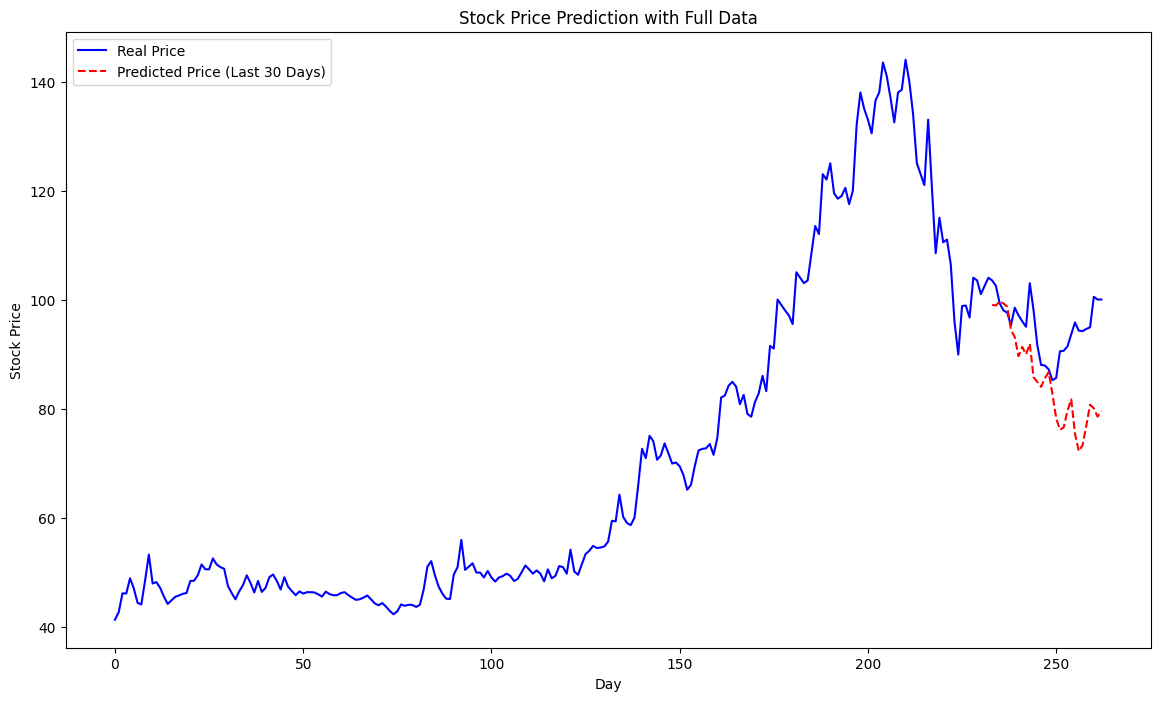

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 將所有資料還原為原始尺度
all_data = scaler.inverse_transform(df['收盤價'].values.reshape(-1, 1)).flatten()
predicted_price = predicted_price.flatten()

# 創建與所有資料長度相同的空白陣列來容納預測結果
full_plot = np.empty_like(all_data)
full_plot[:] = np.nan  # 設定為 NaN 以避免影響前段真實數據

# 把最後 30 天的預測值填入對應位置
full_plot[-30:] = predicted_price

# 繪圖
plt.figure(figsize=(14, 8))
plt.plot(all_data, color='blue', label='Real Price')
plt.plot(full_plot, color='red', linestyle='--', label='Predicted Price (Last 30 Days)')
plt.title('Stock Price Prediction with Full Data')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#### CNN 捕捉 K 線趨勢，並預測股價漲跌

定義：設置短期（如 10 天）和長期（如 30 天）的 EMA，當短期 EMA 向上穿過長期 EMA 時標記為 1（漲），反之為 0（跌）。

In [19]:
df = stock_data.copy()

In [20]:
# 檢查資料是否有 NaN 或 Inf
print(df.isna().sum())  # 檢查每列中的NaN數量
print(df.isin([float('inf'), float('-inf')]).sum())  # 檢查Inf值

# 處理 NaN 和 Inf
df = df.replace([float('inf'), float('-inf')], None)  # 將 Inf 替換為 None
df = df.dropna()  # 刪除含有 NaN 的行


日期      0
成交股數    0
成交金額    0
開盤價     0
最高價     0
最低價     0
收盤價     0
漲跌價差    0
成交筆數    0
dtype: int64
日期      0
成交股數    0
成交金額    0
開盤價     0
最高價     0
最低價     0
收盤價     0
漲跌價差    0
成交筆數    0
dtype: int64


In [27]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=eae91e5c85977d44e9c653400a0b83b92d2200f34315fb2cae2ecd8266b71de0
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [28]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 計算短期和長期 EMA
df['短期EMA'] = ta.ema(df['收盤價'], length=10)
df['長期EMA'] = ta.ema(df['收盤價'], length=30)

# 計算 RSI 技術指標
df['RSI'] = ta.rsi(df['收盤價'], length=14)

# 根據 EMA 交叉定義漲跌標籤
df['label'] = np.where(df['短期EMA'] > df['長期EMA'], 1, 0)

# 去除前面不足以計算 EMA 的資料
df.dropna(inplace=True)

# 準備模型的輸入特徵 (K 線格式)
X = df[['開盤價', '最高價', '最低價', '收盤價', '短期EMA', '長期EMA', 'RSI']].values
y = df['label'].values

# 將每 N 天的 K 線圖合併為一個輸入
N = 5  # 設定要預測的天數
X_seq = []
y_seq = []

for i in range(len(X) - N):
    X_seq.append(X[i:i + N])
    y_seq.append(y[i + N - 1])  # 使用最後一天的標籤

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# CNN 輸入形狀：重塑為 (樣本數, N, 7, 1)
X_seq = X_seq.reshape((X_seq.shape[0], N, 7, 1))

# 建立 CNN 模型
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(N, 7, 1)),
    MaxPooling2D((1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid 層進行二分類
])

# 編譯模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 訓練模型
model.fit(X_seq, y_seq, epochs=10, batch_size=32)

# 評估模型準確率
loss, accuracy = model.evaluate(X_seq, y_seq)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5010 - loss: 5.5368
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5575 - loss: 1.4778 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 1.0218 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8099 - loss: 0.6903 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8331 - loss: 0.4549 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8484 - loss: 0.3598 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8381 - loss: 0.3070 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8397 - loss: 0.2768 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.2525 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8308 - loss: 0.3098 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.4287  
Model Accuracy: 83.41%


In [29]:
pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.9 MB/s eta 0:00:00


In [44]:
# 計算實際標籤，漲則為 1，跌則為 0
df['實際標籤'] = (df['收盤價'].shift(-1) > df['收盤價']).astype(int)  # 將下一天的收盤價與今天的收盤價進行比較

# 取最近一個月的數據
last_month = df.loc[df.index >= (df.index[-1] - pd.Timedelta(days=30))]

# 隨機選取幾天的預測結果
num_random_days = 5  # 設定隨機選取的天數
random_dates = np.random.choice(last_month.index, num_random_days, replace=False)

# 印出隨機日期的預測和實際結果
print("隨機選取的預測結果和實際結果：")
for date in random_dates:
    actual_price = last_month.loc[date, '收盤價']
    prediction = last_month.loc[date, 'label']
    actual_label = last_month.loc[date, '實際標籤']
    print(f"日期: {date}, 實際收盤價: {actual_price}, 預測標籤: {'漲' if prediction == 1 else '跌'}, 實際標籤: {'漲' if actual_label == 1 else '跌'}")

隨機選取的預測結果和實際結果：
日期: 2024-09-05T00:00:00.000000000, 實際收盤價: 88.0, 預測標籤: 跌, 實際標籤: 跌
日期: 2024-09-02T00:00:00.000000000, 實際收盤價: 103.0, 預測標籤: 跌, 實際標籤: 跌
日期: 2024-09-27T00:00:00.000000000, 實際收盤價: 100.0, 預測標籤: 跌, 實際標籤: 跌
日期: 2024-09-30T00:00:00.000000000, 實際收盤價: 100.0, 預測標籤: 跌, 實際標籤: 跌
日期: 2024-09-18T00:00:00.000000000, 實際收盤價: 93.6, 預測標籤: 跌, 實際標籤: 漲


In [38]:
df['Open'] = df['開盤價']
df['High'] = df['最高價']
df['Low'] = df['最低價']
df['Close'] = df['收盤價']

<ipython-input-40-30e4d1906578>:6: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_month = df.last('30D')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36817 (\N{CJK UNIFIED IDEOGRAPH-8FD1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

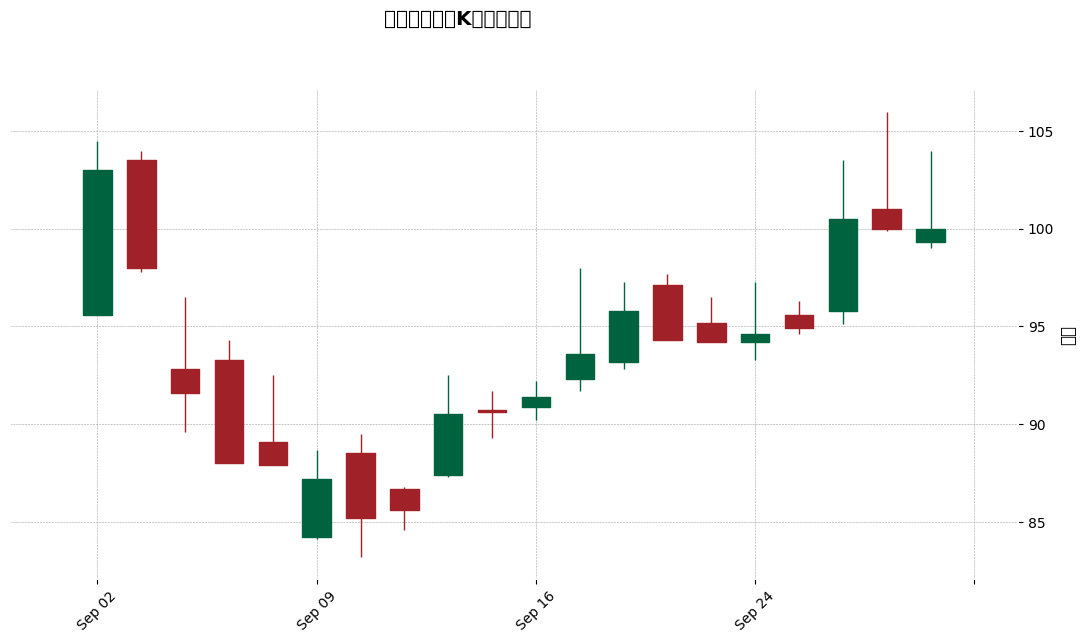

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

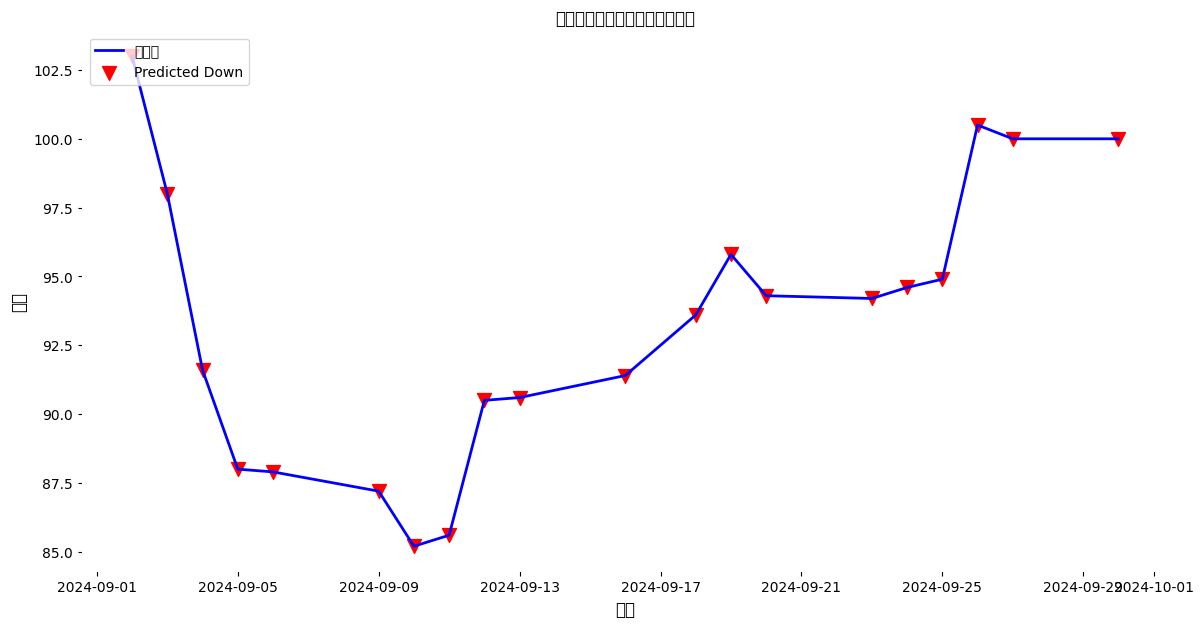

In [40]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# 取最近一個月的數據
last_month = df.last('30D')

# 繪製 K 線圖
mpf.plot(
    last_month,
    type='candle',
    volume=False,
    title='最近一個月的K線圖與預測',
    style='charles',
    ylabel='股價',
    figsize=(14, 7),
)

# 繪製預測標籤
predictions = last_month['label'].values  # 取得標籤
predicted_up_days = last_month.index[predictions == 1]  # 漲的日期
predicted_down_days = last_month.index[predictions == 0]  # 跌的日期

# 在 K 線圖上標註漲跌
plt.figure(figsize=(14, 7))
plt.plot(last_month.index, last_month['收盤價'], label='收盤價', color='blue')

# 標註漲的預測
for date in predicted_up_days:
    plt.scatter(date, last_month.loc[date, '收盤價'], color='green', marker='^', s=100, label='Predicted Up' if date == predicted_up_days[0] else "")

# 標註跌的預測
for date in predicted_down_days:
    plt.scatter(date, last_month.loc[date, '收盤價'], color='red', marker='v', s=100, label='Predicted Down' if date == predicted_down_days[0] else "")

# 顯示圖例和標題
plt.title('最近一個月的收盤價與預測標籤')
plt.xlabel('日期')
plt.ylabel('股價')
plt.legend(loc='upper left')
plt.grid()
plt.show()